<h3>Diavatic prediction</h3>

<b>Context</b><br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.<br>

<b>Dataset Column details</b>

Pregnancies: Number of times pregnant <br>
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
BloodPressure: Diastolic blood pressure (mm Hg)<br>
SkinThickness: Triceps skin fold thickness (mm)<br>
Insulin: 2-Hour serum insulin (mu U/ml)<br>
BMI: Body mass index (weight in kg/(height in m)^2)<br>
DiabetesPedigreeFunction: Diabetes pedigree function<br>
Age: Age (years)<br>
Outcome: Class variable (0 or 1)


In [5]:
#import nessesery package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#import ML necessary package
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [8]:
#import evaluation metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv("diabetes.csv")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<b>Replace Zero</b><br>
Values of columns like BloodPressure, Glucose cannot be accepted as zeros because it will affact the outcome . We can replace such values with the mean of the respective column.

In [12]:
(df.Glucose == 0).value_counts()

Glucose
False    763
True       5
Name: count, dtype: int64

In [13]:
zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [14]:
for column in zero:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
(df.Glucose == 0).value_counts()

Glucose
False    768
Name: count, dtype: int64

<b>Split Dataset</b><br>
Before proceeding futher , Let's split the dataset into train and test.

In [17]:
x = df.iloc[:, 0:8]
y = df.iloc[:, 8]
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 34, test_size = 0.3)

<b>Rule of thumb </b><br>
Any algorithom that computes distance or assumes normality, every column should be same scale .

In [18]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

<b>Find best k value</b>

In [19]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71861472, 0.74025974, 0.74891775, 0.74458874, 0.76190476,
       0.74891775, 0.75324675, 0.75757576, 0.74458874, 0.76190476,
       0.75757576, 0.76190476, 0.75324675, 0.76190476, 0.76623377,
       0.75757576, 0.76190476, 0.77056277, 0.76190476])

In [20]:
std_acc

array([0.02958644, 0.02885066, 0.02853114, 0.02869276, 0.02802333,
       0.02853114, 0.02836574, 0.02819649, 0.02869276, 0.02802333,
       0.02819649, 0.02802333, 0.02836574, 0.02802333, 0.02784617,
       0.02819649, 0.02802333, 0.02766495, 0.02802333])

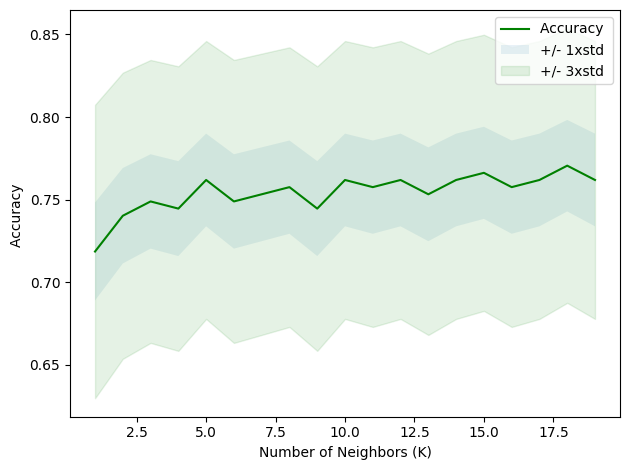

In [33]:
#plot the accuracy 
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
#whick k is best for prediction
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7705627705627706 with k= 18


<b>Fit KNN model</b><br>

In [23]:
#define KNN
knn = KNeighborsClassifier(n_neighbors = 18, p = 2, metric = "euclidean" )
#fit model
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [24]:
#predict test data
y_pred = knn.predict(x_test)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

<b>Evaluation metric</b><br>

In [26]:
#confusion metric
confusion_matrix(y_test, y_pred)

array([[134,  18],
       [ 35,  44]])

In [27]:
#f1_score
f1_score(y_test, y_pred)

0.6241134751773049

In [28]:
#Accuracy score
accuracy_score(y_test, y_pred)

0.7705627705627706

<b> Accuracy of 77% tells us that it is a pretty fair fit in the model</b>